# Fully connected two-layer classifier network

## Notes

* TensorFlow : *Machine learning framework* [[Link]](https://www.tensorflow.org/)
* Keras : *High level neural networks application programming interface (API) which has been integrated into TensorFlow* [[Link]](https://keras.io/)


* **Keras** is written in Python and uses TensorFlow as a back-end on CPUs and GPUs. It was developed with a focus on enabling fast experimentation and prototyping through user friendliness, modularity, and extensibility.


## Create a fully connected two-layer classifier network in Keras

### Import required Python libraries



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
from skimage import transform

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD

### Import and shape the dataset

* typically the data should be pre-processed and shaped before being imported
* typically the dataset, comprising a set of **input:ouput pairs**, is split in a **seen** dataset used for *training* and *validating* the neural network, and an **unseen** dataset used for *testing* the performance of the trained neural network with: <br>
sklearn.model_selection.train_test_split
* the output class of each sample needs to be **one-hot encoded** for classification applications

* Importing and shaping the data *

11501568/11490434 [==============================] - 0s 0us/step
input_train (original):  (60000, 28, 28)
input_test (original):  (10000, 28, 28)

input_train :  (60000, 28, 28, 1)
output_train_class :  (60000,)
output_train_class_onehot :  (60000, 10)

input_test :  (10000, 28, 28, 1)
output_test_class :  (10000,)
output_test_class_onehot :  (10000, 10)

output_class_names :  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

item_id :  5
output_train_class [item_id] :  2
output_train_class_onehot [item_id] :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


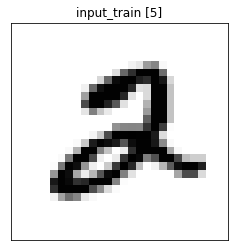

In [2]:
print('* Importing and shaping the data *')
print()

mnist = tf.keras.datasets.mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()

print('input_train (original): ', input_train.shape)
print('input_test (original): ', input_test.shape)
print()

input_train_original = input_train
input_test_original = input_test

input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

input_train = input_train / 255.0  # max normalise the image data[0:1]
input_test = input_test / 255.0

output_train_class_onehot = tf.keras.utils.to_categorical(output_train_class, 10)  # create one-hot encoded class
output_test_class_onehot = tf.keras.utils.to_categorical(output_test_class, 10)

output_class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']    # class names string

print('input_train : ', input_train.shape)
print('output_train_class : ', output_train_class.shape)
print('output_train_class_onehot : ', output_train_class_onehot.shape)
print()
print('input_test : ', input_test.shape)
print('output_test_class : ', output_test_class.shape)
print('output_test_class_onehot : ', output_test_class_onehot.shape)
print()
print('output_class_names : ', output_class_names)
print()

item_id = 5

print('item_id : ', item_id)
print('output_train_class [item_id] : ', output_train_class[item_id])
print('output_train_class_onehot [item_id] : ', output_train_class_onehot[item_id, :])

plt.imshow(input_train[item_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

### Create and display the test set classification report

* provides in-depth statistics of the test data predictions provided by the trained neural network

In [3]:
def display_test_set_report():
    from sklearn.metrics import classification_report

    output_predict_class_onehot = model.predict(input_test)
    output_predict_class = np.argmax(output_predict_class_onehot, axis=1)

    print('* Test set classification report *')
    print()
    print(classification_report(output_test_class, output_predict_class,  \
                                target_names=output_class_names))

### Display the test set confusion probability matrix

. usefull of seeing if and which classes the trained network mixes up

In [4]:
def display_test_confusion_matrix():
    print('* Confusion probability matrix *')
    print()

    import itertools

    from sklearn.metrics import confusion_matrix


    confusion_matrix = confusion_matrix(output_test_class, output_predict_class)  # confusion matrix

    confusion_probability_matrix = confusion_matrix.astype('float') / \
                                  confusion_matrix.sum(axis=1)[:, np.newaxis]  # row normalisation of confusion matrix
    confusion_probability_matrix = confusion_probability_matrix * 100.0  # confusion probability matrix

    plt.imshow(confusion_probability_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalised confusion matrix')    
    plt.colorbar(label='%')
    plt.clim(0, 100)
    tick_marks = np.arange(len(output_class_names))
    plt.xticks(tick_marks, output_class_names, rotation=0)
    plt.yticks(tick_marks, output_class_names)
    fmt = '.1f'
    thresh = confusion_probability_matrix.max() / 2.0
    for i, j in itertools.product(range(confusion_probability_matrix.shape[0]), range(confusion_probability_matrix.shape[1])):
        plt.text(j, i, format(confusion_probability_matrix[i, j], fmt),
                horizontalalignment='center',
                color='white' if confusion_probability_matrix[i, j] > thresh else 'black')    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(None)
    plt.show()
    plt.close()

### Predict the class of a given input

* might need to reshape the input to match the network input shape
* need to apply an argmax to the estimated probabilty distribution provided by the trained network to define the predicted class

In [5]:
def prediction_given_input(test_id):
    print('* Predicting the class of a given input *')
    print()

    #test_id = 38

    input_predict = np.zeros(shape=(1, 28, 28, 1))  # create numpy array of required dimensions for network input

    input_predict[0, :, :, 0] = input_test[test_id, :, :, 0]  # reshaping test input image

    output_predict_class_onehot = model.predict(input_predict)  # softmax distribution of predicted class

    output_predict_class = np.argmax(output_predict_class_onehot[0])  # predicted class of input

    print('test_id : ', test_id)
    print()
    print('output_predict_class_onehot [test_id]: \n\n', output_predict_class_onehot)
    print()
    print('sum[output_predict_class_onehot [test_id]] : ', np.sum(output_predict_class_onehot))  # should be = 1.0
    print()
    print('output_predict_class [item_id] : ', output_predict_class)
    print()

    plt.imshow(input_test[test_id, :, :, 0], cmap=plt.cm.binary)
    plt.title('input_test [' + str(test_id) + ']')
    plt.grid(None)
    plt.xticks([])
    plt.yticks([])
    plt.show()


### Change Number of Hidden nodes

In [6]:
### Define the hyperparameters
optimizer_type = SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

list_num_hidden_nodes = [2,10,20,50,100,200,500,1000,2000]
list_accuracy = []
for num_hidden_nodes in list_num_hidden_nodes:
    ### Define the network architecture
    input_shape = (28, 28, 1)
    inputs = Input(shape=input_shape)

    flatten = Flatten()(inputs)   # 784 nodes = 28x28

    dense_01 = Dense(num_hidden_nodes)(flatten) # For eachlayer, we define the type of layer (Dense) and the input layer
    dense_01 = Activation('sigmoid')(dense_01)
    dense_01 = Dropout(dropout_ratio)(dense_01)

    dense_02 = Dense(10)(dense_01)
    outputs = Activation('softmax')(dense_02)

    ### Compile the network
    print()
    print('* Compiling the network model *')
    print()

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    # display a summary of the compiled neural network

    # print(model.summary())  
    # print()

    # create and save a schematic image of the network architecture

    from tensorflow.keras.utils import plot_model
    from IPython.display import Image

    # print('Graphical schematic of the compiled network')
    # print()

    # plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
    # Image(filename='model.png')

    ### Training the network
    print('* Training the compiled network *')
    print()

    history = model.fit(input_train, output_train_class_onehot, \
                        batch_size=batch_size, \
                        epochs=max_epochs, \
                        validation_split=validtrain_split_ratio, \
                        shuffle=batch_shuffle)

    print()
    print('Training completed')
    print()

    ### Test the model on the unseen test set
    print('* Evaluating the performance of the trained network on the unseen test dataset *')
    print()

    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    loss_metric = evaluate_model [0]
    accuracy_metric = evaluate_model [1]

    print()
    print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
    print('Loss - ' + loss + ': %0.3f'%loss_metric)

    list_accuracy.append(accuracy_metric)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



* Compiling the network model *

* Training the compiled network *

Epoch 1/40
96/96 [==============================] - 2s 13ms/step - loss: 2.1156 - categorical_accuracy: 0.3128 - val_loss: 1.9734 - val_categorical_accuracy: 0.3832
Epoch 2/40
96/96 [==============================] - 1s 8ms/step - loss: 1.8881 - categorical_accuracy: 0.4112 - val_loss: 1.8033 - val_categorical_accuracy: 0.4320
Epoch 3/40
96/96 [==============================] - 1s 10ms/step - loss: 1.7454 - categorical_accuracy: 0.4355 - val_loss: 1.6828 - val_categorical_accuracy: 0.4545
Epoch 4/40
96/96 [==============================] - 1s 8ms/step - loss: 1.6424 - categorical_accuracy: 0.4516 - val_loss: 1.5947 - val_categorical_accuracy: 0.4591
Epoch 5/40
96/96 [==============================] - 1s 8ms/step - loss: 1.5662 - categorical_accuracy: 0.4557 - val_loss: 1.5292 - val_categorical_accuracy: 0.4647
Epoch 6/40
96/96 [==============================] - 1s 10ms/step - loss: 1.5089 - categorical_accuracy: 0.461

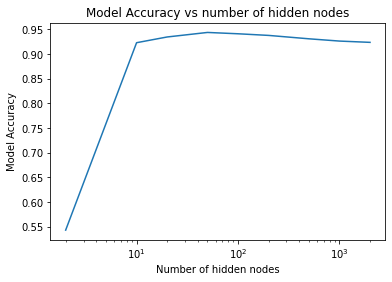

In [7]:
plt.plot(list_num_hidden_nodes,list_accuracy)
plt.title('Model Accuracy vs number of hidden nodes')
plt.xscale('log')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Model Accuracy')
plt.show()
plt.close()

### Change Learning rate



In [8]:
### Define the hyperparameters
optimizer_type = SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

list_learning_rate = [0.2,0.5,1,2,4,6]
list_accuracy = []
for learning_rate in list_learning_rate:
    optimizer_type = SGD(lr=learning_rate)
    ### Define the network architecture
    input_shape = (28, 28, 1)
    inputs = Input(shape=input_shape)

    flatten = Flatten()(inputs)   # 784 nodes = 28x28

    dense_01 = Dense(num_hidden_nodes)(flatten) # For eachlayer, we define the type of layer (Dense) and the input layer
    dense_01 = Activation('sigmoid')(dense_01)
    dense_01 = Dropout(dropout_ratio)(dense_01)

    dense_02 = Dense(10)(dense_01)
    outputs = Activation('softmax')(dense_02)

    ### Compile the network
    print()
    print('* Compiling the network model *')
    print()

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    # display a summary of the compiled neural network

    print(model.summary())  
    print()

    # create and save a schematic image of the network architecture

    from tensorflow.keras.utils import plot_model
    from IPython.display import Image

    print('Graphical schematic of the compiled network')
    print()

    plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
    Image(filename='model.png')

    ### Training the network
    print('* Training the compiled network *')
    print()

    history = model.fit(input_train, output_train_class_onehot, \
                        batch_size=batch_size, \
                        epochs=max_epochs, \
                        validation_split=validtrain_split_ratio, \
                        shuffle=batch_shuffle)

    print()
    print('Training completed')
    print()

    ### Plot loss and accuracy
    # model loss
    # plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    # plt.title('Model loss : ' + loss)
    # plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    # plt.legend(['Training', 'Validation'], loc='best')
    # plt.show()
    # plt.close()

    # # model accuracy metric
    # plt.plot(np.array(history.history[metrics[0]]))
    # plt.plot(np.array(history.history['val_' + metrics[0]]))
    # plt.title('Model accuracy metric : ' + metrics[0])
    # plt.ylabel('Accuracy metric')
    # plt.xlabel('Epoch')
    # plt.legend(['Training', 'Validation'], loc='best')
    # plt.show()
    # plt.close()

    ### Test the model on the unseen test set
    print('* Evaluating the performance of the trained network on the unseen test dataset *')
    print()

    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    loss_metric = evaluate_model [0]
    accuracy_metric = evaluate_model [1]

    print()
    print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
    print('Loss - ' + loss + ': %0.3f'%loss_metric)

    list_accuracy.append(accuracy_metric)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



* Compiling the network model *

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 activation_18 (Activation)  (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
 activation_19 (Activatio

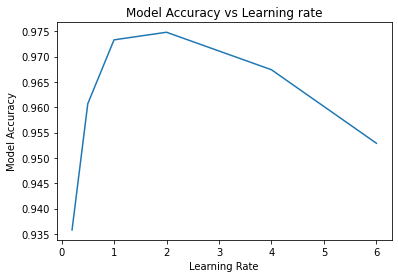

In [9]:
plt.plot(list_learning_rate,list_accuracy)
plt.title('Model Accuracy vs Learning rate')
plt.xscale('linear')
plt.xlabel('Learning Rate')
plt.ylabel('Model Accuracy')
plt.show()
plt.close()

### Change rotation for the test set only






In [10]:
from scipy import ndimage, misc
def rotate(imgset,angle):
  ''' Rotate every image of a set by the given angle '''
  imgsetr = []
  for i in range(len(imgset)):
    # imgsetr.append(skimage.transform.rotate(imgset[i],angle))
    im=ndimage.rotate(imgset[i], angle, axes=(0,1), reshape=False)
    imgsetr.append(im)
  imgsetr = np.array(imgsetr)
  return imgsetr

In [11]:
### Define the hyperparameters
optimizer_type = SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

### Define the network architecture
input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

flatten = Flatten()(inputs)   # 784 nodes = 28x28

dense_01 = Dense(num_hidden_nodes)(flatten) # For eachlayer, we define the type of layer (Dense) and the input layer
dense_01 = Activation('sigmoid')(dense_01)
dense_01 = Dropout(dropout_ratio)(dense_01)

dense_02 = Dense(10)(dense_01)
outputs = Activation('softmax')(dense_02)

### Compile the network
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

### Training the network
print('* Training the compiled network *')
print()

history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)

print()
print('Training completed')
print()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



* Compiling the network model *

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 activation_30 (Activation)  (None, 256)               0         
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                2570      
                                                                 
 activation_31 (Activati

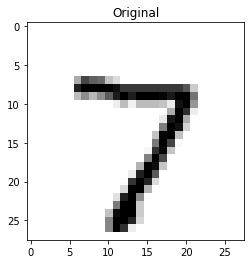

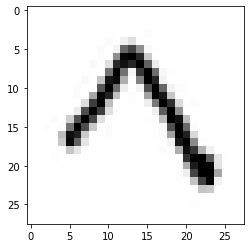

(10000, 28, 28, 1)


In [12]:
input_test = input_test_original
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)
input_test = input_test / 255.0
plt.imshow(input_test[0, :, :, 0], cmap=plt.cm.binary)
plt.title("Original")
plt.show()

plt.figure()
input_test2 = rotate(input_test_original,60)
input_test2= input_test2.reshape(input_test2.shape[0], 28, 28, 1)
input_test2 = input_test2 / 255.0
plt.imshow(input_test2[0, :, :, 0], cmap=plt.cm.binary)
plt.show()

print(input_test2.shape)

In [13]:
list_angle = [0,10,20,40,65,90]
list_accuracy = []
for angle in list_angle:
    input_test = rotate(input_test_original,angle)
    input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)
    input_test = input_test / 255.0

    ### Test the model on the unseen test set
    print('* Evaluating the performance of the trained network on the unseen test dataset *')
    print()

    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    loss_metric = evaluate_model [0]
    accuracy_metric = evaluate_model [1]

    print()
    print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
    print('Loss - ' + loss + ': %0.3f'%loss_metric)

    list_accuracy.append(accuracy_metric)

* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 2ms/step - loss: 0.2257 - categorical_accuracy: 0.9361

Accuracy - categorical_accuracy: 0.936
Loss - categorical_crossentropy: 0.226
* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 2ms/step - loss: 0.3153 - categorical_accuracy: 0.9020

Accuracy - categorical_accuracy: 0.902
Loss - categorical_crossentropy: 0.315
* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 2ms/step - loss: 0.6542 - categorical_accuracy: 0.7813

Accuracy - categorical_accuracy: 0.781
Loss - categorical_crossentropy: 0.654
* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 2ms/step - loss: 2.2982 - categorical_accuracy: 0.4087

Accuracy - categorical_accurac

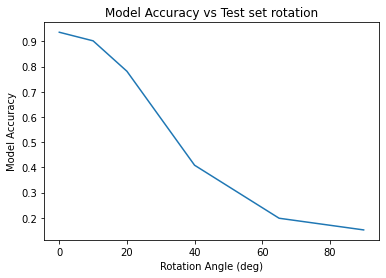

In [14]:
plt.plot(list_angle,list_accuracy)
plt.title('Model Accuracy vs Test set rotation')
plt.xscale('linear')
plt.xlabel('Rotation Angle (deg)')
plt.ylabel('Model Accuracy')
plt.show()
plt.close()

The accuracy decreases quickly when we rotate the images of the test set

### Change rotation for the training and the test set


In [15]:
### Define the hyperparameters
optimizer_type = SGD(lr=0.2)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 256  # number of nodes in hidden fully connected layer

list_angle = [0,10,20,30,40,50,65,90]
list_accuracy = []
for angle in list_angle:
    input_train = rotate(input_train_original,angle)
    input_test = rotate(input_test_original,angle)

    input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
    input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

    input_train = input_train / 255.0  # max normalise the image data[0:1]
    input_test = input_test / 255.0

    ### Define the network architecture
    input_shape = (28, 28, 1)
    inputs = Input(shape=input_shape)

    flatten = Flatten()(inputs)   # 784 nodes = 28x28

    dense_01 = Dense(num_hidden_nodes)(flatten) # For eachlayer, we define the type of layer (Dense) and the input layer
    dense_01 = Activation('sigmoid')(dense_01)
    dense_01 = Dropout(dropout_ratio)(dense_01)

    dense_02 = Dense(10)(dense_01)
    outputs = Activation('softmax')(dense_02)

    ### Compile the network
    print()
    print('* Compiling the network model *')
    print()

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    # display a summary of the compiled neural network

    print(model.summary())  
    print()

    # create and save a schematic image of the network architecture

    from tensorflow.keras.utils import plot_model
    from IPython.display import Image

    print('Graphical schematic of the compiled network')
    print()

    plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
    Image(filename='model.png')

    ### Training the network
    print('* Training the compiled network *')
    print()

    history = model.fit(input_train, output_train_class_onehot, \
                        batch_size=batch_size, \
                        epochs=max_epochs, \
                        validation_split=validtrain_split_ratio, \
                        shuffle=batch_shuffle)

    print()
    print('Training completed')
    print()

    ### Test the model on the unseen test set
    print('* Evaluating the performance of the trained network on the unseen test dataset *')
    print()

    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    loss_metric = evaluate_model [0]
    accuracy_metric = evaluate_model [1]

    print()
    print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
    print('Loss - ' + loss + ': %0.3f'%loss_metric)

    list_accuracy.append(accuracy_metric)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



* Compiling the network model *

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               200960    
                                                                 
 activation_32 (Activation)  (None, 256)               0         
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                2570      
                                                                 
 activation_33 (Activati

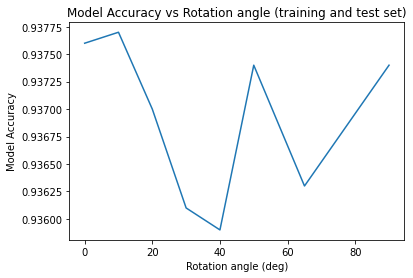

In [16]:
plt.plot(list_angle,list_accuracy)
plt.title('Model Accuracy vs Rotation angle (training and test set)')
plt.xscale('linear')
plt.xlabel('Rotation angle (deg)')
plt.ylabel('Model Accuracy')
plt.show()
plt.close()

The accuracy remains nearly constant for all rotation angle when with we train with the rotated images